In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
import torch.nn as nn
from sklearn import preprocessing

In [14]:
data = pd.read_csv('diamonds.csv', index_col = False)
# data.drop(data.columns[0], axis=1, inplace = True)
data.head()

,carat,cut,color,clarity,depth,table,z,x,y,price
0,0,0,0,0,0.23,0,0,0,3.95,55.0
1,1,1,1,1,0.21,1,0,1,3.89,61.0
2,2,2,2,2,0.23,2,0,2,4.05,65.0
3,3,3,3,3,0.29,1,1,3,4.20,58.0
4,4,4,4,4,0.31,2,2,0,4.34,58.0


In [152]:
data.to_csv('diamonds_normalized.csv',index_label=False)

In [18]:
# change y index to last column
column = list(data.columns)
p = column[6]
z = column[-1]
column[6] = z
column[-1] = p
data = data.reindex(columns = column)
column

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'z', 'y', 'x']

In [142]:
data.head()

,carat,cut,color,clarity,depth,table,z,x,y,price
0,0,0,0,0.23,Ideal,E,SI2,3.95,55.0,326
1,1,1,1,0.21,Premium,E,SI1,3.89,61.0,326
2,2,2,2,0.23,Good,E,VS1,4.05,65.0,327
3,3,3,3,0.29,Premium,I,VS2,4.20,58.0,334
4,4,4,4,0.31,Good,J,SI2,4.34,58.0,335


## Text to Int

In [137]:
def txt2int(data):  
    dict_txt2no = {v:k for k,v in enumerate(data)}
    dict_txt2no.keys()
    dict_txt2int = {v:k for k, v in enumerate(dict_txt2no.keys())}
    dict_txt2int
    return dict_txt2no, dict_txt2int

In [139]:
_, depth_txt2int = txt2int(data['depth'])
depth_txt2int

{'Fair': 4, 'Good': 2, 'Ideal': 0, 'Premium': 1, 'Very Good': 3}

In [140]:
_, table_txt2int = txt2int(data['table'])
table_txt2int

{'D': 6, 'E': 0, 'F': 4, 'G': 5, 'H': 3, 'I': 1, 'J': 2}

In [145]:
_,z_txt2int = txt2int(data['z'])
z_txt2int

{'I1': 6,
 'IF': 7,
 'SI1': 1,
 'SI2': 0,
 'VS1': 2,
 'VS2': 3,
 'VVS1': 5,
 'VVS2': 4}

In [148]:
data['depth'] = data['depth'].replace(depth_txt2int) 
data['table'] = data['table'].replace(table_txt2int)
data['z'] = data['z'].replace(z_txt2int)

In [149]:
data.head()

,carat,cut,color,clarity,depth,table,z,x,y,price
0,0,0,0,0.23,0,0,0,3.95,55.0,326
1,1,1,1,0.21,1,0,1,3.89,61.0,326
2,2,2,2,0.23,2,0,2,4.05,65.0,327
3,3,3,3,0.29,1,1,3,4.20,58.0,334
4,4,4,4,0.31,2,2,0,4.34,58.0,335


In [158]:
data.describe()

,carat,cut,color,clarity,depth,table,z,x,y,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26969.500000,26969.500000,26969.500000,26969.500000,0.797940,1.228940,3.174416,2.256136,5.731157,57.457184
std,15571.281097,15571.281097,15571.281097,15571.281097,0.474011,1.265976,2.050156,1.766539,1.121761,2.234491
min,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,43.000000
25%,13484.750000,13484.750000,13484.750000,13484.750000,0.400000,0.000000,1.000000,1.000000,4.710000,56.000000
50%,26969.500000,26969.500000,26969.500000,26969.500000,0.700000,1.000000,4.000000,2.000000,5.700000,57.000000
75%,40454.250000,40454.250000,40454.250000,40454.250000,1.040000,3.000000,5.000000,3.000000,6.540000,59.000000
max,53939.000000,53939.000000,53939.000000,53939.000000,5.010000,4.000000,6.000000,7.000000,10.740000,95.000000


## Transform Feature Scaling

In [16]:
price = data['price']

In [17]:
data.drop(columns=['price'], axis=1,inplace=True)

In [7]:
data.head()

,carat,cut,color,clarity,depth,table,z,x,y
0,0,0,0,0,0,0.23,0,0,0
1,1,1,1,1,1,0.21,1,0,1
2,2,2,2,2,2,0.23,2,0,2
3,3,3,3,3,3,0.29,1,1,3
4,4,4,4,4,4,0.31,2,2,0


In [190]:
column[:8]

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x']

In [19]:
scaler = preprocessing.StandardScaler()

In [20]:
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns = column)
scaled_data.head()

/media/prince_canuma/DEA8684CA86824ED/PycharmProjects/PythonStuff/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/media/prince_canuma/DEA8684CA86824ED/PycharmProjects/PythonStuff/venv/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,carat,cut,color,clarity,depth,table,z,y,x
0,-1.732019,-1.732019,-1.732019,-1.732019,-1.198168,-0.970753,-1.548392,-1.587837,-1.277163
1,-1.731954,-1.731954,-1.731954,-1.731954,-1.240361,-0.180842,-1.548392,-1.641325,-0.711079
2,-1.731890,-1.731890,-1.731890,-1.731890,-1.198168,0.609070,-1.548392,-1.498691,-0.144995
3,-1.731826,-1.731826,-1.731826,-1.731826,-1.071587,-0.180842,-1.060620,-1.364971,0.421089
4,-1.731762,-1.731762,-1.731762,-1.731762,-1.029394,0.609070,-0.572848,-1.240167,-1.277163


In [21]:
scaled_data['price'] = price

In [22]:
scaled_data.head()

,carat,cut,color,clarity,depth,table,z,y,x,price
0,-1.732019,-1.732019,-1.732019,-1.732019,-1.198168,-0.970753,-1.548392,-1.587837,-1.277163,55.0
1,-1.731954,-1.731954,-1.731954,-1.731954,-1.240361,-0.180842,-1.548392,-1.641325,-0.711079,61.0
2,-1.731890,-1.731890,-1.731890,-1.731890,-1.198168,0.609070,-1.548392,-1.498691,-0.144995,65.0
3,-1.731826,-1.731826,-1.731826,-1.731826,-1.071587,-0.180842,-1.060620,-1.364971,0.421089,58.0
4,-1.731762,-1.731762,-1.731762,-1.731762,-1.029394,0.609070,-0.572848,-1.240167,-1.277163,58.0


## Plot data
 -  Scatter plot
 -  Correletion matrix

In [27]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
def df_scatter_plot(df):
        scatter_matrix(df.loc[:, 'carat':'z'], diagonal='kde')
        plt.tight_layout()
        plt.show()

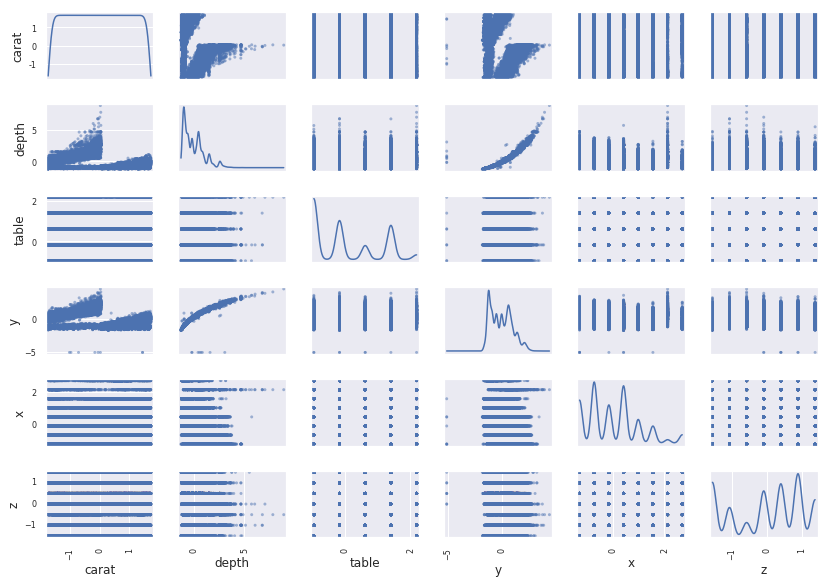

In [209]:
df_scatter_plot(scaled_data)

In [204]:
def class_distribution(df):
        sns.set(rc={'figure.figsize': (11.7, 8.27)})
        sns.distplot(df['price'], bins=2)
        plt.title('Class Distribution')
        plt.show()

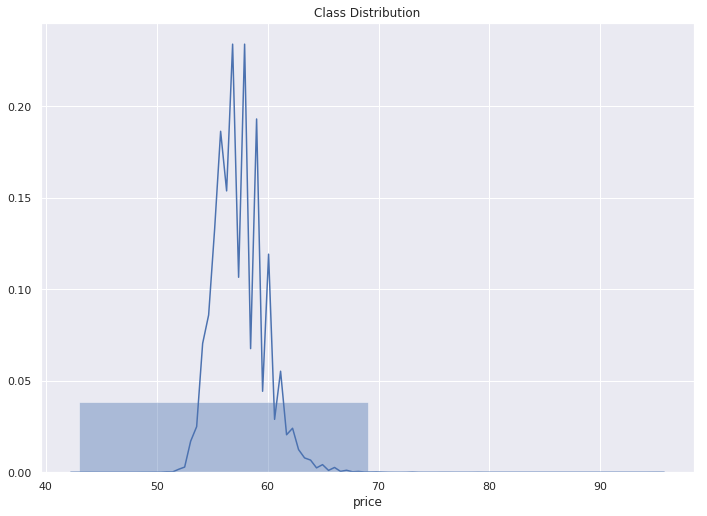

In [205]:
class_distribution(scaled_data)

In [25]:
def correlation_matrix(df):
        corr_matrix = df.corr().round(2)
        sns.heatmap(data=corr_matrix, annot=True)
        plt.suptitle('Correlation Matrix')
        plt.show()

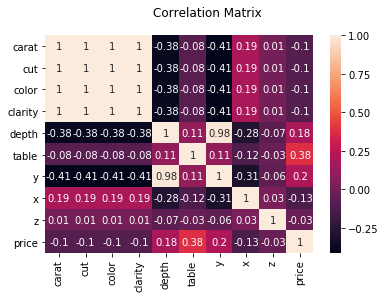

In [200]:
correlation_matrix(scaled_data)

# Feature Selection

In [23]:
scaled_data.drop(columns=['cut','color','clarity'], axis=1,inplace=True)

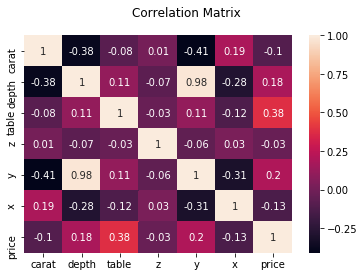

In [28]:
correlation_matrix(scaled_data)

In [29]:
scaled_data.drop(columns=['depth'], axis=1,inplace=True)

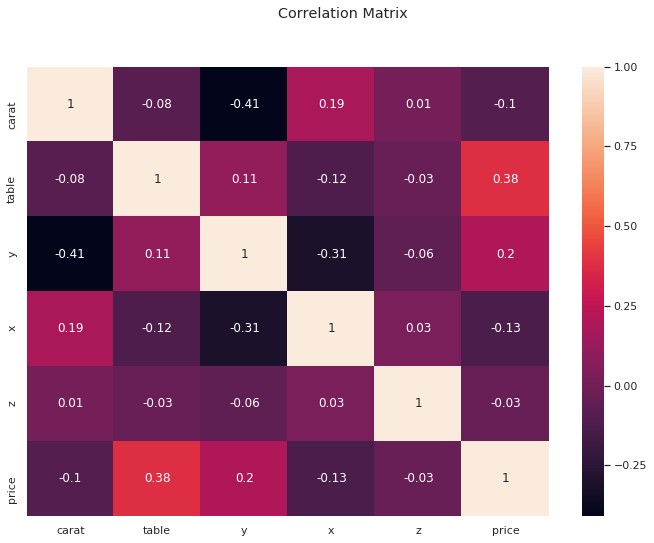

In [211]:
correlation_matrix(scaled_data)


## Data Preparation for Training
In this step we need to separate our label from other atributes because the model reads them separately .

 - Separating the Label into a 1D vector and tranforming it into 0s and 1s.

 - Separating the Features.

In [30]:
price = scaled_data['price']

In [31]:
num_classes = len(price.unique())

In [32]:
scaled_data.drop(columns=['price'], axis=1, inplace=True)

In [33]:
class Dataset_(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self): return len(self.x)
    
    def __getitem__(self,i): return torch.tensor(self.x.iloc[i]), torch.tensor(self.y[i])
    

In [34]:
train_data = Dataset_(scaled_data, price)

In [35]:
num_train = len(train_data)
indices = list(range(num_train))
split = int(num_train * 0.7)
test_split = int(len(indices[split:])*0.1)
train_idx, val_idx = indices[:split], indices[split:]
test_idx = val_idx[:test_split]
del val_idx[:test_split]

In [36]:
train_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(val_idx)
test_sampler = SubsetRandomSampler(test_idx)

In [37]:
bs = 64 
num_workers = 4
train_loader = torch.utils.data.DataLoader(train_data, batch_size=bs,
    sampler=train_sampler, num_workers=num_workers)
val_loader = torch.utils.data.DataLoader(train_data, batch_size=bs, 
    sampler=val_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(train_data, batch_size=bs,
    sampler=test_sampler, num_workers=num_workers)

In [38]:
inp_sz = 5

In [151]:
class model(nn.Module):
    def __init__(self,inp_sz,num_classes, dropout_rate = 0.2):
        super(model, self).__init__()
        self.l1 = nn.Linear(inp_sz, 64)
#         self.l2 = nn.Linear(64,64)
        self.out = nn.Linear(64, 1)
        self.dropout = nn.Dropout(dropout_rate)
        
    def forward(self, x):
        x = F.relu(self.l1(x))
#         x = self.dropout(x)
#         x = F.relu(self.l2(x))
        return self.out(x)

In [152]:
model = model(inp_sz, num_classes)

In [149]:
del model

In [139]:
model

model(
  (l1): Linear(in_features=5, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.2)
)

In [153]:
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2)
criterion = nn.MSELoss()


In [154]:
# number of epochs to train the model
n_epochs = 20 # you may increase this number to train a final model

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in val_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(val_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_2_lyrs.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 55.852834 	Validation Loss: 2.851386
Validation loss decreased (inf --> 2.851386).  Saving model ...
Epoch: 2 	Training Loss: 12.476524 	Validation Loss: 2.352415
Validation loss decreased (2.851386 --> 2.352415).  Saving model ...
Epoch: 3 	Training Loss: 7.006088 	Validation Loss: 1.676368
Validation loss decreased (2.352415 --> 1.676368).  Saving model ...
Epoch: 4 	Training Loss: 6.264889 	Validation Loss: 1.499869
Validation loss decreased (1.676368 --> 1.499869).  Saving model ...
Epoch: 5 	Training Loss: 6.160625 	Validation Loss: 1.751921
Epoch: 6 	Training Loss: 4.873829 	Validation Loss: 1.514008
Epoch: 7 	Training Loss: 4.405517 	Validation Loss: 1.586579
Epoch: 8 	Training Loss: 4.899076 	Validation Loss: 1.861950
Epoch: 9 	Training Loss: 4.572801 	Validation Loss: 1.555280
Epoch: 10 	Training Loss: 4.198290 	Validation Loss: 1.481267
Validation loss decreased (1.499869 --> 1.481267).  Saving model ...
Epoch: 11 	Training Loss: 4.387689 	Validation 

In [155]:
model.load_state_dict(torch.load('model_2_lyrs.pt'))

In [156]:
model.eval()

model(
  (l1): Linear(in_features=5, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.2)
)

In [162]:
x,y = next(iter(test_loader))

In [388]:
x_ = x[0].unsqueeze(0)

In [163]:
preds = model(x)

In [164]:
preds.view(-1,64)

tensor([[56.8363, 57.1913, 56.8358, 56.7905, 56.9285, 56.7792, 56.8845, 56.8919,
         56.7863, 56.8329, 56.9175, 56.7302, 56.8855, 56.8191, 56.9052, 56.7819,
         56.8846, 56.7568, 56.9302, 57.0903, 56.9028, 57.0780, 56.8853, 56.8606,
         56.7575, 56.7169, 57.2291, 56.7599, 56.7539, 56.7548, 56.9422, 56.9058,
         57.0050, 56.7899, 56.9032, 56.9352, 56.8489, 56.6953, 56.8506, 56.9024,
         56.8356, 56.9897, 56.7751, 57.1013, 56.9433, 56.8695, 56.7327, 56.8641,
         56.7980, 56.8566, 56.8290, 56.9616, 56.8880, 56.8156, 56.8335, 56.7691,
         56.7736, 56.8281, 56.9220, 56.7943, 56.8711, 56.7869, 57.0234, 56.9460]],
       grad_fn=<ViewBackward>)

In [165]:
y

tensor([59.0000, 54.0000, 57.0000, 56.0000, 55.0000, 57.0000, 60.0000, 57.0000,
        55.0000, 54.0000, 60.0000, 56.0000, 56.0000, 56.0000, 58.0000, 56.0000,
        56.0000, 57.0000, 57.0000, 59.0000, 59.0000, 58.0000, 56.0000, 57.0000,
        56.0000, 55.0000, 59.0000, 55.8000, 54.0000, 56.0000, 61.0000, 59.0000,
        59.0000, 56.0000, 56.0000, 60.0000, 60.0000, 58.0000, 57.0000, 56.0000,
        58.0000, 57.0000, 56.0000, 61.0000, 54.5000, 56.0000, 57.0000, 57.0000,
        55.0000, 57.0000, 57.0000, 56.0000, 55.0000, 57.0000, 54.0000, 57.0000,
        57.0000, 55.0000, 60.0000, 55.0000, 59.0000, 60.0000, 60.0000, 58.0000])

In [166]:
torch.isclose(y.type(torch.int32), preds.type(torch.int32).data[1]).sum()

tensor(15)

In [161]:
torch.isclose(y.type(torch.int32), preds.type(torch.int32).data[1]).sum()

tensor(21)